## TODO:

2. Preprocessing - hot-one and scaling on labels -- try testing
2.   Feature selection -- modify final dataset
        -try recursive method
        - try correlation matrix on features.v.s.labels



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/tyiannak/pyAudioAnalysis.git
! pip install -r /content/pyAudioAnalysis/requirements.txt
! pip install -e

Cloning into 'pyAudioAnalysis'...
remote: Enumerating objects: 3041, done.
remote: Counting objects: 100% (514/514), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 3041 (delta 429), reused 397 (delta 397), pack-reused 2527
Receiving objects: 100% (3041/3041), 167.65 MiB | 13.25 MiB/s, done.
Resolving deltas: 100% (1817/1817), done.
Updating files: 100% (276/276), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 9.5 MB/s eta 0:00:00

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  p

In [ ]:
!apt-get install -y ffmpeg eyed3
!pip install pyAudioAnalysis


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
The following additional packages will be installed:
  python3-eyed3 python3-magic
Suggested packages:
  python3-pil python3-pylast python3-requests
The following NEW packages will be installed:
  eyed3 python3-eyed3 python3-magic
0 upgraded, 3 newly installed, 0 to remove and 32 not upgraded.
Need to get 115 kB of archives.
After this operation, 593 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 python3-magic all 2:0.4.24-2 [12.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 python3-eyed3 all 0.8.10-4 [91.0 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 eyed3 all 0.8.10-4 [11.3 kB]
Fetched 115 kB in 1s (124 kB/s)
Selecting previously unselected package python3-magic.
(Reading database ... 121747 files and directories currently installed.)
Pr

## Get Kaggle dataset

Suggested for speech emotion: iemocap, emodb, ravdess, savee.

In [ ]:
api_token = {"username":"lspart","key":"589f3fdd7c941d7f8b97f7e4a8423cbd"}

import json
import os

os.makedirs("/root/.kaggle", exist_ok=True)

with open("/root/.kaggle/kaggle.json", "w") as file:
    json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
%mkdir data
%cd data

/content/data


In [ ]:
'''
!kaggle datasets download -d mrmorj/dataset-of-songs-in-spotify
%mkdir dataset-of-songs-in-spotify
%mv dataset-of-songs-in-spotify.zip dataset-of-songs-in-spotify
%cd dataset-of-songs-in-spotify
!unzip dataset-of-songs-in-spotify.zip
%cd ..

!kaggle datasets download -d piyushagni5/berlin-database-of-emotional-speech-emodb
%mkdir berlin-database-of-emotional-speech-emodb
%mv berlin-database-of-emotional-speech-emodb.zip berlin-database-of-emotional-speech-emodb
%cd berlin-database-of-emotional-speech-emodb
!unzip berlin-database-of-emotional-speech-emodb.zip
%cd ..

!kaggle datasets download -d samuelsamsudinng/iemocap-emotion-speech-database
%mkdir iemocap-emotion-speech-database
%mv iemocap-emotion-speech-database.zip iemocap-emotion-speech-database
%cd iemocap-emotion-speech-database
!unzip iemocap-emotion-speech-database.zip
%cd ..
'''
# play with this
'''
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-song-audio
ravdess_filepath = '/content/data/ravdess-emotional-song-audio'
%mkdir ravdess-emotional-song-audio
%mv ravdess-emotional-song-audio.zip ravdess-emotional-song-audio
%cd ravdess-emotional-song-audio
!unzip ravdess-emotional-song-audio.zip
%cd ..
'''
!kaggle datasets download -d imsparsh/deam-mediaeval-dataset-emotional-analysis-in-music
ravdess_filepath = '/content/data/deam-mediaeval-dataset-emotional-analysis-in-music'
%mkdir deam-mediaeval-dataset-emotional-analysis-in-music
%mv deam-mediaeval-dataset-emotional-analysis-in-music.zip deam-mediaeval-dataset-emotional-analysis-in-music
%cd deam-mediaeval-dataset-emotional-analysis-in-music
!unzip deam-mediaeval-dataset-emotional-analysis-in-music.zip
#make a smaller dataset of 10 songs
%mkdir sample_dataset
%cp /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1000.mp3 sample_dataset/1000.mp3
%cp /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1001.mp3 sample_dataset/1001.mp3
%cp /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1002.mp3 sample_dataset/1002.mp3
%cp /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1003.mp3 sample_dataset/1003.mp3
%cp /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1004.mp3 sample_dataset/1004.mp3
%cp /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1005.mp3 sample_dataset/1005.mp3
%cp /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1006.mp3 sample_dataset/1006.mp3
%cp /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1007.mp3 sample_dataset/1007.mp3
%cp /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1008.mp3 sample_dataset/1008.mp3
%cp /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1009.mp3 sample_dataset/1009.mp3
%cd ..

### mp3 to wav converter script

In [ ]:
! pip install pydub
!apt update
!sudo apt install ffmpeg
!pip install pydub audioread


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [662 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,056 kB]
Get:13 http://archive.ubun

In [ ]:
songsFolder = "/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio"
%mkdir "/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav"

mkdir: cannot create directory ‘/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav’: No such file or directory


In [ ]:
import subprocess

#songsFolder = "/content/drive/MyDrive/ai_unipi/MachineLearning/media/"
#songname = "Dropkick Murphys - _Rose Tattoo"


from pydub import AudioSegment

def lib_mp3to_wav (song,out_path):
  sound = AudioSegment.from_mp3(song)
  sound.export(out_path, format="wav")

def wavConverter(songsFolder):
  dir = os.listdir(songsFolder)
  for song in dir:
    subprocess.call(['ffmpeg', '-i', songsFolder + "/" +song,
                    songsFolder +'/wav/' + song + ".wav"])

In [ ]:
wavConverter(songsFolder)

# RAVDESS Emotion in Song database

In [ ]:
import pandas as pd
dir = os.listdir(ravdess_filepath)

males = []
females = []
total_data = []
print(dir)
for actor in dir:
    if actor != "ravdess-emotional-song-audio.zip":
      files = os.listdir(ravdess_filepath + '/' + actor)
      print(files)
    if actor != "audio_song_actors_01-24":
      for file in files:
          print("====", file)
          part = file.split('.')[0]
          part = part.split("-")
          temp = int(part[6])

          if part[2] == '01':
              emotion = 'neutral'
          elif part[2] == '02':
              emotion = 'calm'
          elif part[2] == '03':
              emotion = 'happy'
          elif part[2] == '04':
              emotion = 'sad'
          elif part[2] == '05':
              emotion = 'angry'
          elif part[2] == '06':
              emotion = 'fear'
          elif part[2] == '07':
              emotion = 'disgust'
          elif part[2] == '08':
              emotion = 'surprise'
          else:
              emotion = 'unknown'

          if temp%2 == 0:
              path = (ravdess_filepath + '/' + actor + '/' + file)
              #emotion = 'female_'+emotion
              females.append([emotion, part[3], path])
              total_data.append([emotion, part[3], path, "female"])
          else:
              path = (ravdess_filepath + '/' +  actor + '/' + file)
              #emotion = 'male_'+emotion
              males.append([emotion, part[3], path])
              total_data.append([emotion, part[3], path, "male"])

RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'intensity', 'path']
RavFemales_df.to_csv("data_female.csv",index=False)

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels',  'intensity', 'path']

TotalData_df = pd.DataFrame(total_data)
TotalData_df.columns = ['labels',  'intensity', 'path', "gender"]
TotalData_df.to_csv("total_data.csv",index=False)

print('RAVDESS datasets')
print(RavFemales_df.head())
print(RavMales_df.head())

['deam-mediaeval-dataset-emotional-analysis-in-music.zip', 'features', 'DEAM_audio', 'DEAM_Annotations']


NotADirectoryError: [Errno 20] Not a directory: '/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/deam-mediaeval-dataset-emotional-analysis-in-music.zip'

In [ ]:
TotalData_df

,labels,intensity,path,gender
0,happy,02,/content/data/ravdess-emotional-song-audio/Act...,female
1,fear,02,/content/data/ravdess-emotional-song-audio/Act...,female
2,sad,02,/content/data/ravdess-emotional-song-audio/Act...,female
3,fear,01,/content/data/ravdess-emotional-song-audio/Act...,female
4,sad,01,/content/data/ravdess-emotional-song-audio/Act...,female
...,...,...,...,...
1051,neutral,01,/content/data/ravdess-emotional-song-audio/Act...,female
1052,angry,02,/content/data/ravdess-emotional-song-audio/Act...,female
1053,happy,02,/content/data/ravdess-emotional-song-audio/Act...,female
1054,sad,01,/content/data/ravdess-emotional-song-audio/Act...,female


In [ ]:
# set labels as the emotion
y = TotalData_df["labels"]
print(y)

0         happy
1          fear
2           sad
3          fear
4           sad
         ...   
1051    neutral
1052      angry
1053      happy
1054        sad
1055      happy
Name: labels, Length: 1056, dtype: object


# sample audio feature extraction example

In [ ]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures, MidTermFeatures
import matplotlib.pyplot as plt
[Fs, x] = audioBasicIO.read_audio_file("/content/drive/MyDrive/ai_unipi/MachineLearning/media/1006.wav")
print(Fs, x.shape)
ws = 0.050 * Fs
ss = 0.050 * Fs
# mid-term window size, since its 1,
#it will average all shortterm frames to 1 midterm frame
mws = 1 * Fs
mss = 1 * Fs
# x:signal
# Fs: rate/frequency sampling
# ws: sample_length/ window size
# ss: sample_step

# Copmutes 34 features:
#1	    Zero Crossing Rate
#2	    Energy
#3	    Entropy of Energy
#4	    Spectral Centroid
#5	    Spectral Spread
#6	    Spectral Entropy
#7	    Spectral Flux
#8	    Spectral Rolloff
#9-21	  MFCCs	Mel
#22-33	Chroma Vector
#34	    Chroma Deviation

#Also computes additional 30 delta features, disable with deltas = false
if len(x.shape) == 1:
    F, feature_names = ShortTermFeatures.feature_extraction(
    x, Fs, ws, ss, deltas=False)
else:
    F, feature_names = ShortTermFeatures.feature_extraction(
    x[:, 0], Fs, ws, ss, deltas=False)
print(F.shape, feature_names, len(feature_names))
# alternatively, use below command to exrtact midterm and shortterm in csv and numpy array
#!python3 /content/pyAudioAnalysis/pyAudioAnalysis/audioAnalysis.py featureExtractionFile -i /content/drive/MyDrive/ai_unipi/MachineLearning/media/1006.wav -mw 1.0 -ms 1.0 -sw 0.050 -ss 0.050 -o /content/drive/MyDrive/ai_unipi/MachineLearning/media/1006.wav

# mid-term feature extraction --- 136 features
# features are the mean and std of multiple shorttermfeatures vectors
# mid_window > short_window
# essentialy, midterm averages of a set number of shortterm frames
mid_features, s, mid_feature_names = MidTermFeatures.mid_feature_extraction(x[:, 0], Fs,
                              mws,
                              mss,
                              ws,
                              ss)
print(mid_features.shape, mid_feature_names, len(mid_feature_names))
print(s.shape, s)
#compute beat
# long term averaging of mid-term statistics
# HERE since we only set 1 midterm windo, this is not necesery
#mid_features = mid_features.mean(axis=1)

#beat, beat_conf = MidTermFeatures.beat_extraction(s, ss)
#mid_features = np.append(mid_features, beat)
#mid_features = np.append(mid_features, beat_conf)
#feature_vector = (mid_features - mean) / std    # normalization


44100 (1984501, 2)
(34, 900) ['zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread', 'spectral_entropy', 'spectral_flux', 'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'chroma_12', 'chroma_std'] 34
(136, 45) ['zcr_mean', 'energy_mean', 'energy_entropy_mean', 'spectral_centroid_mean', 'spectral_spread_mean', 'spectral_entropy_mean', 'spectral_flux_mean', 'spectral_rolloff_mean', 'mfcc_1_mean', 'mfcc_2_mean', 'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'mfcc_6_mean', 'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean', 'mfcc_10_mean', 'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean', 'chroma_1_mean', 'chroma_2_mean', 'chroma_3_mean', 'chroma_4_mean', 'chroma_5_mean', 'chroma_6_mean', 'chroma_7_mean', 'chroma_8_mean', 'chroma_9_mean', 'chro

# Feature Extraction (RAVDESS example)
Makke sure to save the data.pkl file localy or on a permanent storage , so we dont calculate this each time


1) With PyAudioAnalysis


In [ ]:
import os
from pyAudioAnalysis import MidTermFeatures as mtf
from pyAudioAnalysis import ShortTermFeatures
import pickle
import os.path
import pandas as pd
import numpy as np

# for each folder in ravdess (each actor), extract the audio features
dir = os.listdir(ravdess_filepath)
all_mid_term_features = []
all_wav_file_list = []
if os.path.isfile('data.pkl'):
    with open('data.pkl','rb') as f:
        mid_term_features_2 = pickle.load(f)
        wav_file_list2 = pickle.load(f)
else:
    with open('data.pkl','wb') as f:
      # computes all audio features of wav files in given folder
      for actor in dir:
        if actor != "ravdess-emotional-song-audio.zip" and actor != "audio_song_actors_01-24":
          mid_term_features, wav_file_list2, mid_feature_names = ShortTermFeatures.feature_extraction('/content/data/ravdess-emotional-song-audio/' + actor, 1, 1,
                                                                                                  0.1, 0.1)
          #mtf.directory_feature_extraction('/content/data/ravdess-emotional-song-audio/' + actor, 1, 1, 0.1, 0.1)
          m = mid_term_features.mean(axis=0)
          s = np.std(mid_term_features, axis = 0)
          mid_term_features_2 = (mid_term_features - m) / s
          # Append the features and file information to the lists
          all_mid_term_features.append(mid_term_features_2)
          all_wav_file_list.extend(wav_file_list2)

      pickle.dump(mid_term_features_2, f)
      pickle.dump(wav_file_list2, f)

# we now have all sound features extracted from wav files
# print dimensions
print(mid_term_features_2.shape)
wavFeatures_df = pd.DataFrame(mid_term_features_2)
print(wavFeatures_df.head())

ImportError: cannot import name 'MidTermFeatures' from 'pyAudioAnalysis' (unknown location)

In [ ]:
# create audio feature dataset

wavFeatures_df.columns = [mid_feature_names]
print(wavFeatures_df.head())



   zcr_mean energy_mean energy_entropy_mean spectral_centroid_mean  \
0 -0.934441    0.455266            0.834272               0.556218   
1 -0.915381   -0.522076            1.034630              -0.909681   
2 -0.787551    0.416190            1.187163               0.952203   
3 -0.778021    1.078430            1.316529               0.982017   
4 -0.603161    1.106987            1.183452               0.171810   

  spectral_spread_mean spectral_entropy_mean spectral_flux_mean  \
0             0.935839             -1.391961           0.596138   
1             1.351650             -1.976131           0.108354   
2             0.928615             -1.121944           0.680229   
3             1.344996             -1.291046          -0.422191   
4             1.229691             -1.549851          -0.321947   

  spectral_rolloff_mean mfcc_1_mean mfcc_2_mean  ... delta chroma_6_std  \
0             -1.362468   -1.383371   -0.006073  ...           1.365280   
1             -1.652430   

2) With Librosa

In [ ]:
import librosa
import numpy as np
import scipy.io.wavfile as wav

def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=2.0).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=2.0).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally
    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=2.0).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    return result

#fs, audio = wav.read(audio_path)
#data, sampling_rate = librosa.load(fname)
#plt.figure(figsize=(15, 5))
#librosa.display.waveplot(data, sr=sampling_rate)


22050 (55125,)


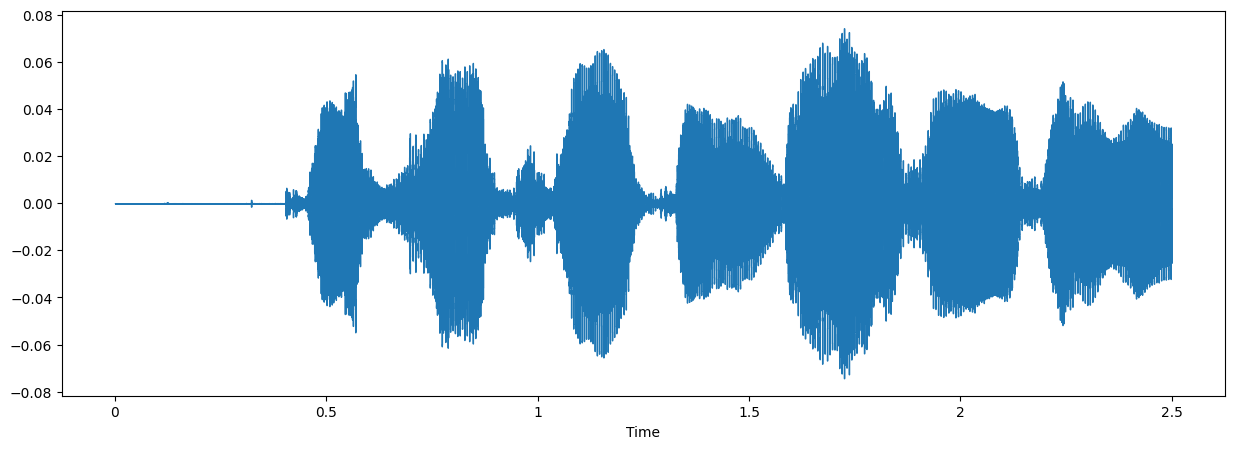

In [ ]:
import librosa.display
data, sample_rate = librosa.load('/content/data/ravdess-emotional-song-audio/Actor_01/03-02-01-01-01-01-01.wav', duration=2.5, offset=0.6)
print(sample_rate, data.shape)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sample_rate)

<ipython-input-40-134d6d124258>:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio = wav.read('/content/data/ravdess-emotional-song-audio/Actor_01/03-02-01-01-01-01-01.wav')


48000 (203404,)
(203404,)


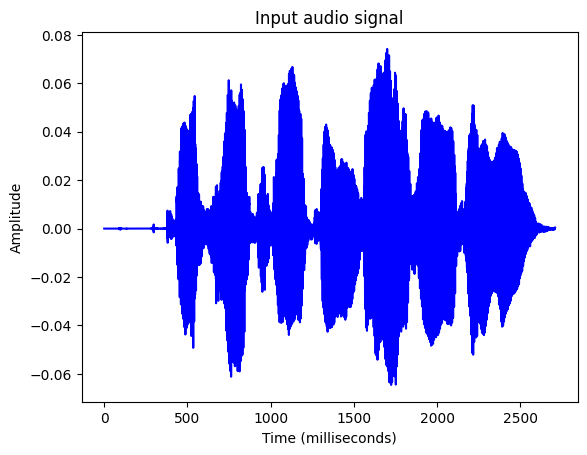

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# fs: frequency sampling
fs, audio = wav.read('/content/data/ravdess-emotional-song-audio/Actor_01/03-02-01-01-01-01-01.wav')
print(fs, audio.shape)
audio = audio / np.power(2, 15)
print(audio.shape)

# plot audio in time
audio_signal = audio [30000:160000]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(fs)
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

In [ ]:
X, Y = [], []
print(RavFemales_df.head())
for path, emotion in zip(RavFemales_df["path"], RavFemales_df["labels"]):
    feature = get_features(path)
    for ele in  feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

  labels intensity                                               path
0  happy        02  /content/data/ravdess-emotional-song-audio/Act...
1   fear        02  /content/data/ravdess-emotional-song-audio/Act...
2    sad        02  /content/data/ravdess-emotional-song-audio/Act...
3   fear        01  /content/data/ravdess-emotional-song-audio/Act...
4    sad        01  /content/data/ravdess-emotional-song-audio/Act...


/usr/local/lib/python3.10/dist-packages/pyAudioAnalysis/../librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
from sklearn.decomposition import PCA
import pandas
import plotly.express as px

pca = PCA(n_components=2)
X = pca.fit_transform(mid_term_features_2)
print(X.shape)

# prepare data to plot in 2D space:
data_to_plot = []
for i in range(X.shape[0]):
        data_to_plot.append({'pca1':X[i][0], 'pca2': X[i][1],
            'name': wav_file_list2[i][6:7]})


df = pandas.DataFrame(data_to_plot)
fig = px.scatter(df, x="pca1", y="pca2", text="name", size_max=60)
fig.update_layout(
    height=800,
    title_text='Principal components 1 and 2'
)
fig.show()

NameError: ignored

# DEAM feature dataset creation

has 1-1802 audio clips
last 29 dataset from 2015, FULL songs
rest is 45s clips 2013-2014 dataset
We will use the 2013-2014 songs (744 training + 1000 evaluation)

Enumeration in audio files start from 2 and end in 2058, but total is 1802 songs


# DEAM dataset unzip, workspace preparation

In [ ]:
# zip the wav files so we can download and use instead of calculating all the time
# around 12 GB
!zip -r /content/deam_wav.zip /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav

updating: content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/ (stored 0%)
updating: content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/730.mp3.wav (deflated 31%)
updating: content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1036.mp3.wav (deflated 10%)
updating: content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/395.mp3.wav


zip error: Interrupted (aborting)
^C


In [ ]:
# use ziped wav file from drive
# This takes about 10 mins...
drive_wav_path = '/content/drive/MyDrive/ai_unipi/MachineLearning/media/deam_wav.zip'
metadata_drive_path =  '/content/drive/MyDrive/ai_unipi/MachineLearning/media/metadata.zip'
data_pkl_path = '/content/data.pkl'
mid_term_full_path ='/content/drive/MyDrive/ai_unipi/MachineLearning/media/mid_audio_full.csv'
mid_term_pkl_full_path ='/content/drive/MyDrive/ai_unipi/MachineLearning/media/midterm_audio_full.pkl'
#!cd '/content'
# v this takes a LONGGG timeee
#!cp '/content/drive/MyDrive/ai_unipi/MachineLearning/media/deam_wav.zip' '/content'
#!cp '/content/drive/MyDrive/ai_unipi/MachineLearning/media/data.pkl' '/content'
!cp -r '/content/drive/MyDrive/ai_unipi/MachineLearning/media/metadata' '/content'
!cp '/content/drive/MyDrive/ai_unipi/MachineLearning/media/mid_audio_full.csv' '/content'
!cp '/content/drive/MyDrive/ai_unipi/MachineLearning/media/midterm_audio_full.pkl' '/content'
# extract wav fron drive to local colab env
#!unzip '/content/deam_wav.zip'
# unzip metadata and put in the local data folder

In [ ]:
%cp '/content/drive/MyDrive/ai_unipi/MachineLearning/media/1080.wav'  'sample_dataset/1080.wav'

In [ ]:
# make a sample_dataset folder of 10 wav files to experiment
#with audio feature extraction (do not do whole dataset and wait for 1 hour)

# Assuming we have copied the already transformed wav files from my drive to the collab local env:
local_wav_path = '/content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/'
%cd '/content'
%mkdir sample_dataset
%cp /content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1000.mp3.wav sample_dataset/1000.mp3.wav
%cp /content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1001.mp3.wav sample_dataset/1001.mp3.wav
%cp /content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1002.mp3.wav sample_dataset/1002.mp3.wav
%cp /content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1003.mp3.wav sample_dataset/1003.mp3.wav
%cp /content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1004.mp3.wav sample_dataset/1004.mp3.wav
%cp /content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1005.mp3.wav sample_dataset/1005.mp3.wav
%cp /content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1006.mp3.wav sample_dataset/1006.mp3.wav
%cp /content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1007.mp3.wav sample_dataset/1007.mp3.wav
%cp /content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1008.mp3.wav sample_dataset/1008.mp3.wav
%cp /content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1009.mp3.wav sample_dataset/1009.mp3.wav
%cd ..

/content
cp: cannot stat '/content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1000.mp3.wav': No such file or directory
cp: cannot stat '/content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1001.mp3.wav': No such file or directory
cp: cannot stat '/content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1002.mp3.wav': No such file or directory
cp: cannot stat '/content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1003.mp3.wav': No such file or directory
cp: cannot stat '/content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1004.mp3.wav': No such file or directory
cp: cannot stat '/content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/1005.mp3.wav': No such file or directory
cp: cannot stat '/c

## Feature extraction

Need to add metadata features, like pitch, tempo, genre, etc...

In [ ]:
# audio feature with pyAudioAnalysis instead of the ready features.zip from opensmile
############## DO MP3 TO WAV CONVERTION CELL FIRST

deam_audio_path = '/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/'
pkl_path = '/content/data.pkl'
import os
import pandas as pd
from pyAudioAnalysis import MidTermFeatures as mtf

from pyAudioAnalysis import ShortTermFeatures, audioBasicIO
import pickle
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def audio_feature_extraction(deam_audio_path, pkl_path, shortTerm = False):
    [Fs, x] = audioBasicIO.read_audio_file("/content/drive/MyDrive/ai_unipi/MachineLearning/media/1006.wav")
    print(Fs, x.shape)
    ws = 0.050 * Fs
    ss = 0.050 * Fs
    # mid-term window size, since its 1,
    #it will average all shortterm frames to 1 midterm frame
    mws = 1 * Fs
    mss = 1 * Fs
    # for each folder in ravdess (each actor), extract the audio features
    dir = os.listdir(deam_audio_path)
    tott = len(dir)
    all_mid_term_features = []
    all_files = []
    all_feature_names = []
    if os.path.isfile(pkl_path):
        with open(pkl_path,'rb') as f:
            mid_term_features_2 = pickle.load(f)
            wav_file_list2 = pickle.load(f)
            #mid_feature_names = pickle.load(f)

            all_mid_term_features = mid_term_features_2
            # get col labels
            _, _, mid_feature_names = mtf.mid_feature_extraction(x[:, 0], Fs,
                              mws,
                              mss,
                              ws,
                              ss)
            print('extracted!')
            print(mid_term_features_2.shape, mid_term_features_2, mid_feature_names )
            print(len(wav_file_list2))
            wavFeatures_df = pd.DataFrame(all_mid_term_features)
            if shortTerm != True:
                for i,filename in enumerate(wav_file_list2):
                    filename = filename.split('/')[-1]
                    wav_file_list2[i] = filename.split('.')[0]

                wavFeatures_df.columns = [mid_feature_names]
                wavFeatures_df['song_id'] = wav_file_list2
            print(wavFeatures_df.head())
    else:
        with open(pkl_path,'wb') as f:
            if shortTerm:
                    # this loop is for using ShortTermFeature. Otherwise, comment it
                j = 0
                for fille in dir:
                    print(j, "/", tott, fille)
                    # computes all audio features of wav files in given folder
                    [Fs, x] = audioBasicIO.read_audio_file(deam_audio_path + fille)
                    #print(Fs,x.shape)
                    if len(x.shape) == 1:
                        mid_term_features_2, mid_feature_names = ShortTermFeatures.feature_extraction(x, Fs, 0.08*Fs, 0.08*Fs)
                    else:
                        mid_term_features_2, mid_feature_names = ShortTermFeatures.feature_extraction(x[:,0], Fs, 0.08*Fs, 0.08*Fs)
                    #print(F.shape, feature_names, len(feature_names))

                    all_mid_term_features.append(mid_term_features_2)
                    all_feature_names.append(mid_feature_names)
                    all_files.append(fille)

                    j += 1
            else:
                mid_term_features, wav_file_list2, mid_feature_names = mtf.directory_feature_extraction(deam_audio_path ,1,1, 0.080, 0.08)
                # Append the features and file information to the lists
                print(mid_term_features, wav_file_list2, mid_feature_names)
                #beat, beat_conf = mtf.beat_extraction(mid_term_features, 0.1)
                #mid_features = np.append(mid_features, beat)
                #mid_features = np.append(mid_features, beat_conf)

                # Save before standardization
                wavFeatures_df = pd.DataFrame(mid_term_features)
                if shortTerm != True:
                    for i,filename in enumerate(wav_file_list2):
                        filename = filename.split('/')[-1]
                        wav_file_list2[i] = filename.split('.')[0]
                wavFeatures_df.columns = [mid_feature_names]
                wavFeatures_df['song_id'] = wav_file_list2
                ffile = open('unnormalized_midterm.pkl', 'wb')
                pickle.dump(wavFeatures_df, ffile)
                ffile.close()
                # Standardization
                m = mid_term_features.mean(axis=0)
                s = np.std(mid_term_features, axis = 0)
                print(s)
                mid_term_features_2 = (mid_term_features - m) / s
                all_mid_term_features = mid_term_features_2
                all_feature_names = mid_feature_names
                all_files = mid_feature_names

                print(all_mid_term_features, all_feature_names)
            # in shorttermffeatures, here it is an array. Change to mid_term+features_2 and wav_file_list2
            #all_mid_term_features = all_mid_term_features.reshape(-1, all_mid_term_features.shape[2])

            #pickle.dump(all_mid_term_features, f)
            #pickle.dump(all_files, f)
            #pickle.dump(all_feature_names, f)

            # we now have all sound features extracted from wav files
            # print dimensions
            print(len(all_mid_term_features))
            wavFeatures_df = pd.DataFrame(all_mid_term_features)
            # cahnge the wav_filename_list to just the filename (song_id)
            if shortTerm != True:
                for i,filename in enumerate(wav_file_list2):
                    filename = filename.split('/')[-1]
                    wav_file_list2[i] = filename.split('.')[0]

            wavFeatures_df.columns = [mid_feature_names]
            wavFeatures_df['song_id'] = wav_file_list2

            pickle.dump(wavFeatures_df, f)
            print(wavFeatures_df.head())
    wavFeatures_df.to_csv('/content/drive/MyDrive/ai_unipi/MachineLearning/media/mid_audio_full.csv')
    # create dataframe and return it
    return wavFeatures_df

# for newer versions of above, where okl saves the whole dataframe
# use below to load
def pkl_to_pd(pkl_path):
    with open(pkl_path,'rb') as f:
        mid_term_features_2 = pickle.load(f)
    return mid_term_features_2

def csv_to_pd(csv_path):
    return pd.read_csv(csv_path, index_col=0)
def pd_to_csv(pd_path):
    return pd.read_csv(csv_path, index_col=0)
#audio_feature_extraction(deam_audio_path)

ModuleNotFoundError: No module named 'pyAudioAnalysis'

In [3]:
import pandas as pd

def csv_to_pd(csv_path):
    return pd.read_csv(csv_path, index_col=0)

In [ ]:
# audio feature with pyAudioAnalysis instead of the ready features.zip from opensmile
############## DO MP3 TO WAV CONVERTION CELL FIRST

deam_audio_path = '/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/'
pkl_path = '/content/data.pkl'
import os
import pandas as pd
from pyAudioAnalysis import MidTermFeatures as mtf

from pyAudioAnalysis import ShortTermFeatures, audioBasicIO
import pickle
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def audio_feature_extraction(deam_audio_path, pkl_path, shortTerm = False):
    [Fs, x] = audioBasicIO.read_audio_file("/content/drive/MyDrive/ai_unipi/MachineLearning/media/1006.wav")
    print(Fs, x.shape)
    ws = 0.050 * Fs
    ss = 0.050 * Fs
    # mid-term window size, since its 1,
    #it will average all shortterm frames to 1 midterm frame
    mws = 1 * Fs
    mss = 1 * Fs
    # for each folder in ravdess (each actor), extract the audio features
    dir = os.listdir(deam_audio_path)
    tott = len(dir)
    all_mid_term_features = []
    all_files = []
    all_feature_names = []
    if os.path.isfile(pkl_path):
        with open(pkl_path,'rb') as f:
            mid_term_features_2 = pickle.load(f)
            wav_file_list2 = pickle.load(f)
            #mid_feature_names = pickle.load(f)

            all_mid_term_features = mid_term_features_2
            # get col labels
            _, _, mid_feature_names = mtf.mid_feature_extraction(x[:, 0], Fs,
                              mws,
                              mss,
                              ws,
                              ss)
            print('extracted!')
            print(mid_term_features_2.shape, mid_term_features_2, mid_feature_names )
            print(len(wav_file_list2))
            wavFeatures_df = pd.DataFrame(all_mid_term_features)
            if shortTerm != True:
                for i,filename in enumerate(wav_file_list2):
                    filename = filename.split('/')[-1]
                    wav_file_list2[i] = filename.split('.')[0]

                wavFeatures_df.columns = [mid_feature_names]
                wavFeatures_df['song_id'] = wav_file_list2
            print(wavFeatures_df.head())
    else:
        with open(pkl_path,'wb') as f:
            if shortTerm:
                    # this loop is for using ShortTermFeature. Otherwise, comment it
                j = 0
                for fille in dir:
                    print(j, "/", tott, fille)
                    # computes all audio features of wav files in given folder
                    [Fs, x] = audioBasicIO.read_audio_file(deam_audio_path + fille)
                    #print(Fs,x.shape)
                    if len(x.shape) == 1:
                        mid_term_features_2, mid_feature_names = ShortTermFeatures.feature_extraction(x, Fs, 0.08*Fs, 0.08*Fs)
                    else:
                        mid_term_features_2, mid_feature_names = ShortTermFeatures.feature_extraction(x[:,0], Fs, 0.08*Fs, 0.08*Fs)
                    #print(F.shape, feature_names, len(feature_names))

                    all_mid_term_features.append(mid_term_features_2)
                    all_feature_names.append(mid_feature_names)
                    all_files.append(fille)

                    j += 1
            else:
                mid_term_features, wav_file_list2, mid_feature_names = mtf.directory_feature_extraction(deam_audio_path ,1,1, 0.080, 0.08)
                # Append the features and file information to the lists
                print(mid_term_features, wav_file_list2, mid_feature_names)
                #beat, beat_conf = mtf.beat_extraction(mid_term_features, 0.1)
                #mid_features = np.append(mid_features, beat)
                #mid_features = np.append(mid_features, beat_conf)

                # Save before standardization
                wavFeatures_df = pd.DataFrame(mid_term_features)
                if shortTerm != True:
                    for i,filename in enumerate(wav_file_list2):
                        filename = filename.split('/')[-1]
                        wav_file_list2[i] = filename.split('.')[0]
                wavFeatures_df.columns = [mid_feature_names]
                wavFeatures_df['song_id'] = wav_file_list2
                ffile = open('unnormalized_midterm.pkl', 'wb')
                pickle.dump(wavFeatures_df, ffile)
                ffile.close()
                # Standardization
                m = mid_term_features.mean(axis=0)
                s = np.std(mid_term_features, axis = 0)
                print(s)
                mid_term_features_2 = (mid_term_features - m) / s
                all_mid_term_features = mid_term_features_2
                all_feature_names = mid_feature_names
                all_files = mid_feature_names

                print(all_mid_term_features, all_feature_names)
            # in shorttermffeatures, here it is an array. Change to mid_term+features_2 and wav_file_list2
            #all_mid_term_features = all_mid_term_features.reshape(-1, all_mid_term_features.shape[2])

            #pickle.dump(all_mid_term_features, f)
            #pickle.dump(all_files, f)
            #pickle.dump(all_feature_names, f)

            # we now have all sound features extracted from wav files
            # print dimensions
            print(len(all_mid_term_features))
            wavFeatures_df = pd.DataFrame(all_mid_term_features)
            # cahnge the wav_filename_list to just the filename (song_id)
            if shortTerm != True:
                for i,filename in enumerate(wav_file_list2):
                    filename = filename.split('/')[-1]
                    wav_file_list2[i] = filename.split('.')[0]

            wavFeatures_df.columns = [mid_feature_names]
            wavFeatures_df['song_id'] = wav_file_list2

            pickle.dump(wavFeatures_df, f)
            print(wavFeatures_df.head())
    wavFeatures_df.to_csv('/content/drive/MyDrive/ai_unipi/MachineLearning/media/mid_audio_full.csv')
    # create dataframe and return it
    return wavFeatures_df

# for newer versions of above, where okl saves the whole dataframe
# use below to load
def pkl_to_pd(pkl_path):
    with open(pkl_path,'rb') as f:
        mid_term_features_2 = pickle.load(f)
    return mid_term_features_2

def csv_to_pd(csv_path):
    return pd.read_csv(csv_path, index_col=0)
#audio_feature_extraction(deam_audio_path)

ImportError: cannot import name 'MidTermFeatures' from 'pyAudioAnalysis' (unknown location)

In [ ]:
%cd /content
sample_path = '/content/sample_dataset/'
aa = audio_feature_extraction('/content/sample_dataset', '/content/sample.pkl', False)
#%cp /midterm_audio_sample.pkl /content/drive/MyDrive/ai_unipi/MachineLearning/media

/content
44100 (1984501, 2)
Analyzing file 1 of 3: /content/sample_dataset/1006.wav
Analyzing file 2 of 3: /content/sample_dataset/1009.wav
Analyzing file 3 of 3: /content/sample_dataset/1080.wav
Feature extraction complexity ratio: 16.7 x realtime
[[ 4.50696451e-02  7.23858459e-03  3.05367698e+00  1.25287398e-01
   1.60136605e-01  3.40922697e-01  1.09721216e-02  6.62595889e-02
  -2.72999096e+01  2.22102408e+00 -2.62858828e-01 -1.85276734e-01
  -6.20567633e-02 -7.80917863e-02 -5.36662000e-02 -8.01927878e-02
   2.29085043e-01  1.17360589e-01  1.54769767e-01  1.15054196e-01
   6.02839216e-02  1.02855229e-02  1.01480374e-02  1.52924192e-02
   1.08884300e-02  1.51274151e-02  2.15995191e-02  1.25714598e-02
   1.47819858e-02  1.95075879e-02  2.93452604e-02  6.63373642e-03
   8.11217676e-03  2.50189083e-02  4.18252709e-05 -1.43049460e-04
  -3.20333136e-04  4.76465435e-05  4.53090830e-05  7.49952719e-04
   8.69787087e-06  1.34285393e-04 -1.42987158e-03  1.19018076e-03
   1.10531442e-03  1.8309

In [ ]:
meta1 = '/content/metadata/metadata_2013.csv'
meta2 = '/content/metadata/metadata_2014.csv'

get_audio_features(meta1, sample_path, mid_term_pkl_full_path, meta2)

NameError: name 'get_audio_features' is not defined

In [ ]:
# play with a small 10 sample songs
datapkl = 'midterm_audio_full.pkl'
%cd '/content/'
%cd '/content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/sample_dataset/'
audio_feature_extraction('/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/', datapkl)
%cp /content/midterm_audio_full.pkl /content/drive/MyDrive/ai_unipi/MachineLearning/media

/content
[Errno 2] No such file or directory: '/content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/sample_dataset/'
/content
44100 (1984501, 2)
Analyzing file 1 of 1802: /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/10.mp3
Analyzing file 2 of 1802: /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1000.mp3
Analyzing file 3 of 1802: /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1001.mp3
Analyzing file 4 of 1802: /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1002.mp3
Analyzing file 5 of 1802: /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1003.mp3
Analyzing file 6 of 1802: /content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1004.mp3
Analyzing file 7 of 1802: /content/data/deam-mediaeval-dataset-emotional-analy

In [ ]:
import pandas as pd
import os
import csv

def csv_to_pkl (mid_audio_full):
    aa = pd.read_csv(mid_audio_full)
    aa.to_pickle('out.pkl')
    with open('out.pkl','rb') as f:
        read_pkl = pickle.load(f)
    return read_pkl

def remove_tabs(value):
    return value.strip('\t')
# Creates Final CSV of audio features + metadata + valence&arousal labels
def get_features(deam_path, csv_audio_features_path):
    emotions = ["happy", # Valence > 0 and Arousal >0
        "calm"   # Valence > 0 and Arousal < 0
        "angry",  # Valence <0 and Arousal > 0
        "sad",  # Valence < 0 and Arousal < 0
    ]

    au_df = csv_to_pd(csv_audio_features_path)
    print(au_df.head())
    df = pd.read_csv(deam_path, usecols=['song_id', ' valence_mean', ' arousal_mean'])
    print(df[' arousal_mean'].min(), df[' arousal_mean'].max())
    print(df[' valence_mean'].min(), df[' valence_mean'].max())
    # Rename columns
    df.rename(columns = {' valence_mean':'valence'}, inplace = True)
    df.rename(columns = {' arousal_mean':'arousal'}, inplace = True)

    total_data = pd.DataFrame(au_df)

    # go row by row, coz some annotations missing from DEAM
    for indfex, row in df.iterrows():
        if row['song_id'] in total_data['song_id'].values:
            total_data.loc[total_data['song_id'].values == row['song_id'], 'valence'] = row['valence']
            total_data.loc[total_data['song_id'].values == row['song_id'], 'arousal'] = row['arousal']
    print(total_data.head())
    print('oh')
    print(df['valence'])

    # create the labels
    for indfex, row in total_data.iterrows():
      if row['valence'] >= 5 and row['arousal'] >= 5:
          total_data.at[indfex, 'emotion'] = 1
      if row['valence'] >= 5 and row['arousal'] < 5:
          total_data.at[indfex, 'emotion'] = 2
      if row['valence'] < 5 and row['arousal'] >= 5:
          total_data.at[indfex, 'emotion'] = 3
      if row['valence'] < 5 and row['arousal'] < 5:
          total_data.at[indfex, 'emotion'] = 4
    print('done')
    print(total_data)

    # since some annotations were missing,
    # create a test dataset with the missing annotations
    empty_values_df = total_data[total_data['valence'].isnull()]
    empty_values_df = empty_values_df.drop(columns=['valence','arousal','emotion'])
    print(empty_values_df)

    # and only keep fully annotated data for training
    total_data = total_data.dropna()
    TotalData_df = pd.DataFrame(total_data)
    #TotalData_df.columns = ['song',  'emotion', 'arousal', "valence"]
    TotalData_df.to_csv("total_data.csv",index=False)


    return TotalData_df, empty_values_df

def get_metadata_pd (metadata_path, output_csv_path):
    dataframes = []

    for file in os.listdir(metadata_path):
        meta_df = pd.read_csv(metadata_path1)
        dataframes.append(meta_df)

    final_meta_df = pd.concat(dataframes, ignore_index=True)
    final_meta_df.to_csv(output_csv_path, index=False)
    print(final_meta_df.head())
    return final_meta_df


# Instead, create the CSV of audio features + metadata ONLY
def get_audio_features(metadata_path1, audio_filepath, pkl_path, metadata_path2=""):

    au_df = audio_feature_extraction(audio_filepath, pkl_path)
    # metadata
    meta_df = pd.read_csv(metadata_path1)
    metaDF = pd.DataFrame(meta_df)
    if metadata_path2 != "":
        meta_df2 = pd.read_csv(metadata_path2)
        metaDF2 = pd.DataFrame(meta_df2)
        metaDF.append(metaDF2)
    # merge audio features and metadata features
    frames = [au_df, metaDF]
    TotalData_df = pd.concat(frames)

    TotalData_df.to_csv("total_data_audio_metadata.csv",index=False)

    return TotalData_df

def merge_feat_and_metadata (mid_term_csv_path, meta1, meta2, meta3):
    # metadata is split into 3 groups, total 2058 songs
    # midterm features are 1802 of these songs
    # so for all 3 metadata files, loop and attach the entry with 'song_id' same as mid_term_feature 'song_id'

    audio_df = pd.read_csv(mid_term_csv_path)
    audio_df=pd.DataFrame(audio_df)
    meta_df1 = pd.read_csv(meta1)
    meta_df2 = pd.read_csv(meta2)
    meta_df3 = pd.read_csv(meta3)

    meta_df1 = pd.DataFrame(meta_df1)
    meta_df2 = pd.DataFrame(meta_df2)
    meta_df3 = pd.DataFrame(meta_df3)
    # merge audio features and metadata features
    #frames = [audio_df, metaDF['genre']]
    # TotalData_df = pd.concat(frames)
    metas = [meta_df1, meta_df2, meta_df3]
    print( meta_df1['song_id'].head())
    print( audio_df['song_id'].head())
    audio_df.reset_index(drop=True)
    for meta_df in metas:
        meta_df.reset_index(drop=True)
        for indfex, row in audio_df.iterrows():
            if audio_df['song_id'] == meta_df['song_id']:
                audio_df['Genre'] = meta_df['Genre']
    return audio_df

In [ ]:
tt = csv_to_pd('/content/drive/MyDrive/ai_unipi/MachineLearning/media/total_data.csv')
tt = tt.dropna()
tt.to_csv('/content/total_data_nonan.csv')
print(tt)

      zcr_mean  energy_mean  energy_entropy_mean  spectral_centroid_mean  \
0    -0.174710    -0.774566             0.030276               -0.200111   
1     0.380791     1.045841             0.365854                0.377840   
2     0.292477    -0.063243             0.840085               -0.128733   
3    -0.983304    -1.044797            -0.374764               -0.806344   
4    -0.344802    -1.084248            -2.433123                0.231515   
...        ...          ...                  ...                     ...   
1797  0.838604     1.993246            -1.710779                2.109487   
1798  1.366235    -0.556953             1.202746                1.035852   
1799  0.785507     0.004841            -0.740913                0.238785   
1800  0.487497     0.439203            -1.930553               -0.036658   
1801 -0.118367    -0.247396            -0.362523               -0.294860   

      spectral_spread_mean  spectral_entropy_mean  spectral_flux_mean  \
0             

In [ ]:
tt, ee = get_features('/content/drive/MyDrive/ai_unipi/MachineLearning/media/static_annotations_averaged_songs_1_2000.csv', '/content/mid_audio_full.csv')
tt.to_csv('/content/total_annotated_data.csv')
ee.to_csv('/content/total_not_annotated_data.csv')
print(tt.shape)

   zcr_mean  energy_mean  energy_entropy_mean  spectral_centroid_mean  \
0 -0.174710    -0.774566             0.030276               -0.200111   
1  0.380791     1.045841             0.365854                0.377840   
2  0.292477    -0.063243             0.840085               -0.128733   
3 -0.983304    -1.044797            -0.374764               -0.806344   
4 -0.344802    -1.084248            -2.433123                0.231515   

   spectral_spread_mean  spectral_entropy_mean  spectral_flux_mean  \
0             -0.004680              -0.193153            0.864971   
1              0.217572               0.305879           -0.469400   
2             -0.409315               0.145741           -0.818416   
3             -0.071832              -0.846609            1.969040   
4              0.188764               0.176503            2.567123   

   spectral_rolloff_mean  mfcc_1_mean  mfcc_2_mean  ...  delta chroma_7_std  \
0              -0.282300    -0.876862     0.073389  ...      

In [ ]:
meta1 = '/content/metadata/metadata_2013.csv'
meta2 = '/content/metadata/metadata_2014.csv'
meta3 = '/content/metadata/metadata_2015.csv'
mid_term_csv_path = '/content/mid_audio_full.csv'

merge_feat_and_metadata(mid_term_csv_path, meta1, meta2, meta3)

0    2
1    3
2    4
3    5
4    7
Name: song_id, dtype: int64
0      10
1    1000
2    1001
3    1002
4    1003
Name: song_id, dtype: int64


ValueError: Can only compare identically-labeled Series objects

In [ ]:
import pandas as pd
metadata_path1 = '/content/metadata/metadata_2013.csv'
metadata_path2 = '/content/metadata/metadata_2014.csv'
meta_df1 = pd.read_csv(metadata_path1)
meta_df1 = meta_df1.applymap(lambda x: x.strip('\t') if isinstance(x, str) else x)
meta_df2 = pd.read_csv(metadata_path2)
meta_df1 = pd.DataFrame(meta_df1)
meta_df2 = pd.DataFrame(meta_df2)

print(meta_df2['Genre'], meta_df1['Genre'])

0        Folk
1       Blues
2       Blues
3       Blues
4       Blues
        ...  
995    SoulRB
996    SoulRB
997    SoulRB
998    SoulRB
999    SoulRB
Name: Genre, Length: 1000, dtype: object 0      Blues
1      Blues
2      Blues
3      Blues
4      Blues
       ...  
739     Rock
740     Rock
741     Rock
742     Rock
743     Rock
Name: Genre, Length: 744, dtype: object


In [ ]:
mm = [meta_df1, meta_df2]
mm = pd.concat(mm)
print(mm)

                                                    song_id file_name  \
0                                                       2.0   \t2.mp3   
1                                                       3.0   \t3.mp3   
2                                                       4.0   \t4.mp3   
3                                                       5.0   \t5.mp3   
4                                                       7.0   \t7.mp3   
...                                                     ...       ...   
(1996, The Matt Kurz One, IF YOU CAN'T JOIN 'EM...      NaN       NaN   
(1997, Ariel Pink's Haunted Graffiti, The Doldr...      NaN       NaN   
(1998, Fresh Body Shop, The Ugly Army, My Artif...      NaN       NaN   
(1999, The Gotobeds, Live on WFMU's Cherry Blos...      NaN       NaN   
(2000, Fresh Body Shop, The Ugly Army, Never En...      NaN       NaN   

                                                                            Artist  \
0                                    

In [ ]:
# static annotations more prone to work on songs
# dynamic annotations more reliable from 2015 dataset

# static (song_level) contains an average value of valence + arousal over the whole 45sec clips
# dynamic contains samples of these labels for every 0.5sec in the whole 45sec clip
deam_path = '/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_Annotations/annotations/annotations averaged per song/song_level/static_annotations_averaged_songs_1_2000.csv'
audio_wav_path = '/content/data/content/data/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/wav/'
data_pkl_path = '/content/data.pkl'
total_df = get_features(deam_path, audio_wav_path, data_pkl_path )

NameError: name 'get_features' is not defined

In [ ]:
print(total_df.head())

NameError: name 'total_df' is not defined

### Normalization

In [ ]:
 # Get featues in the X, y format:
#features, labels = features_to_matrix(data)


#### WE ALREADY DO THIS AT AUDIO EXTRACTION #######


from sklearn.preprocessing import StandardScaler
# Use mean/std standard feature scaling:
aa = save_pkl_from_csv('/content/mid_audio_full.csv')
scaler = StandardScaler()
features = scaler.fit_transform(aa)
mean = scaler.mean_.tolist()
std = scaler.scale_.tolist()

scaler = StandardScaler()
F = scaler.fit_transform(aa)

# check that the new PCA dimension is at most equal
# to the number of samples
K1 = 2
K2 = 10
if K1 > F.shape[0]:
    K1 = F.shape[0]
if K2 > F.shape[0]:
    K2 = F.shape[0]
#pca1 = sklearn.decomposition.PCA(n_components = K1)
#pca1.fit(F)
#pca2 = sklearn.decomposition.PCA(n_components = K2)
#pca2.fit(F)

#finalDims = pca1.transform(F)
#finalDims2 = pca2.transform(F)


In [ ]:
feature_path = '/content/drive/MyDrive/ai_unipi/MachineLearning/media/total_data_nonan.csv'

## Feature selection

In [82]:
# Define training data and labels
import numpy as np
import pandas as pd
feature_path = '/content/drive/MyDrive/ai_unipi/MachineLearning/media/total_annotated_data.csv'
data = csv_to_pd(feature_path)
X = np.array(data.iloc[:, :-3].values)#.T
y = np.array(data['emotion'])
y_r = np.array([data['valence'],data['arousal']])
print(y_r)
feature_names = data.columns.values
print(X.shape)
print(y.shape)
print(feature_names)

## dataset without the std values
filter_columns = list(range(0, 67)) + list(range(136, 142))
midterm_mean = data.iloc[:, filter_columns].copy()
## dataset without the deltas and std values (short term features)
filter_columns = list(range(0, 34)) + list(range(136, 142))
short_term = data.iloc[:, filter_columns].copy()

midterm_mean.to_csv("/content/drive/MyDrive/ai_unipi/MachineLearning/media/total_data_no_std.csv",index=False)
short_term.to_csv("/content/drive/MyDrive/ai_unipi/MachineLearning/media/total_data_no_std_no_deltas.csv",index=False)

X_means = np.array(midterm_mean.iloc[:, :-3].values)#.T
y_means = np.array(midterm_mean['emotion'])
y_means_r = np.array([midterm_mean['valence'],midterm_mean['arousal']])

[[4.  6.8 4.4 ... 6.  6.4 4.1]
 [4.7 5.6 3.8 ... 6.7 6.7 5.9]]
(1744, 139)
(1744,)
['zcr_mean' 'energy_mean' 'energy_entropy_mean' 'spectral_centroid_mean'
 'spectral_spread_mean' 'spectral_entropy_mean' 'spectral_flux_mean'
 'spectral_rolloff_mean' 'mfcc_1_mean' 'mfcc_2_mean' 'mfcc_3_mean'
 'mfcc_4_mean' 'mfcc_5_mean' 'mfcc_6_mean' 'mfcc_7_mean' 'mfcc_8_mean'
 'mfcc_9_mean' 'mfcc_10_mean' 'mfcc_11_mean' 'mfcc_12_mean' 'mfcc_13_mean'
 'chroma_1_mean' 'chroma_2_mean' 'chroma_3_mean' 'chroma_4_mean'
 'chroma_5_mean' 'chroma_6_mean' 'chroma_7_mean' 'chroma_8_mean'
 'chroma_9_mean' 'chroma_10_mean' 'chroma_11_mean' 'chroma_12_mean'
 'chroma_std_mean' 'delta zcr_mean' 'delta energy_mean'
 'delta energy_entropy_mean' 'delta spectral_centroid_mean'
 'delta spectral_spread_mean' 'delta spectral_entropy_mean'
 'delta spectral_flux_mean' 'delta spectral_rolloff_mean'
 'delta mfcc_1_mean' 'delta mfcc_2_mean' 'delta mfcc_3_mean'
 'delta mfcc_4_mean' 'delta mfcc_5_mean' 'delta mfcc_6_mean'
 'delta 

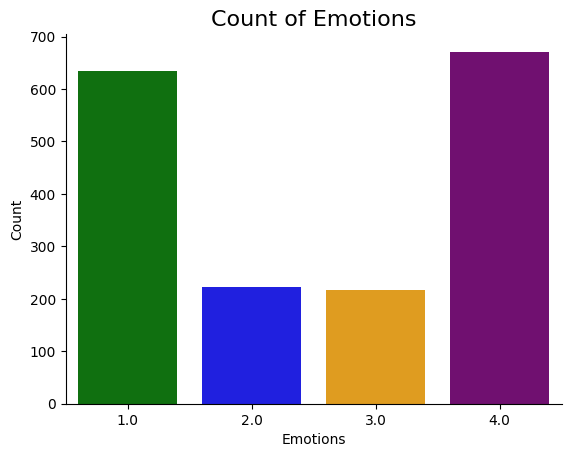

[[-1.74709836e-01 -7.74566012e-01  3.02759973e-02 ...  1.72405530e+00
  -3.05389308e-01  1.00000000e+01]
 [ 3.80790782e-01  1.04584078e+00  3.65854373e-01 ...  8.47607654e-02
   3.79391197e-01  1.00000000e+03]
 [ 2.92476571e-01 -6.32429380e-02  8.40085462e-01 ... -3.83609102e-01
  -1.83831525e-01  1.00100000e+03]
 ...
 [ 7.85507015e-01  4.84074770e-03 -7.40912547e-01 ... -3.83609102e-01
   8.56922894e-01  9.96000000e+02]
 [ 4.87497105e-01  4.39202943e-01 -1.93055292e+00 ... -3.83609102e-01
  -5.24315931e-01  9.97000000e+02]
 [-1.18367041e-01 -2.47395603e-01 -3.62522541e-01 ... -1.68063335e+00
   3.14354849e-01  9.99000000e+02]]


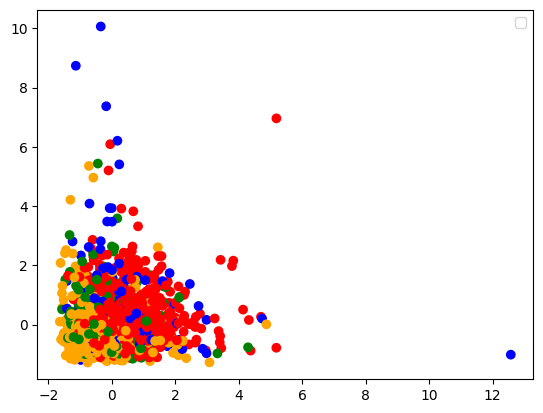

In [96]:
### Visualizing different labels count
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(x='emotion', data=data, palette=['green', 'blue', 'orange', 'purple'])
plt.ylabel('Count')
plt.xlabel('Emotions')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# SCATTERPLOT for feature selection
# Define colors for each label
colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'orange'}
print(data.iloc[:, :-3].values)
# plot based on 2 features their scatter of all 4 emotions
# we shall choose features with more discernible scatters
#### this method is too counterproductive to take all combinations of all 140 features!!
plt.scatter(data.iloc[:, 0].values , data.iloc[:, 1].values, c=data['emotion'].map(colors))
plt.legend()
plt.show()


### Correlation matrix between input features

https://www.kaggle.com/code/bbloggsbott/feature-selection-correlation-and-p-value

   zcr_mean  energy_mean  energy_entropy_mean  spectral_centroid_mean  \
0 -0.174710    -0.774566             0.030276               -0.200111   
1  0.380791     1.045841             0.365854                0.377840   
2  0.292477    -0.063243             0.840085               -0.128733   
3 -0.983304    -1.044797            -0.374764               -0.806344   
4 -0.344802    -1.084248            -2.433123                0.231515   

   spectral_spread_mean  spectral_entropy_mean  spectral_flux_mean  \
0             -0.004680              -0.193153            0.864971   
1              0.217572               0.305879           -0.469400   
2             -0.409315               0.145741           -0.818416   
3             -0.071832              -0.846609            1.969040   
4              0.188764               0.176503            2.567123   

   spectral_rolloff_mean  mfcc_1_mean  mfcc_2_mean  ...  delta chroma_10_std  \
0              -0.282300    -0.876862     0.073389  ...     

<Axes: >

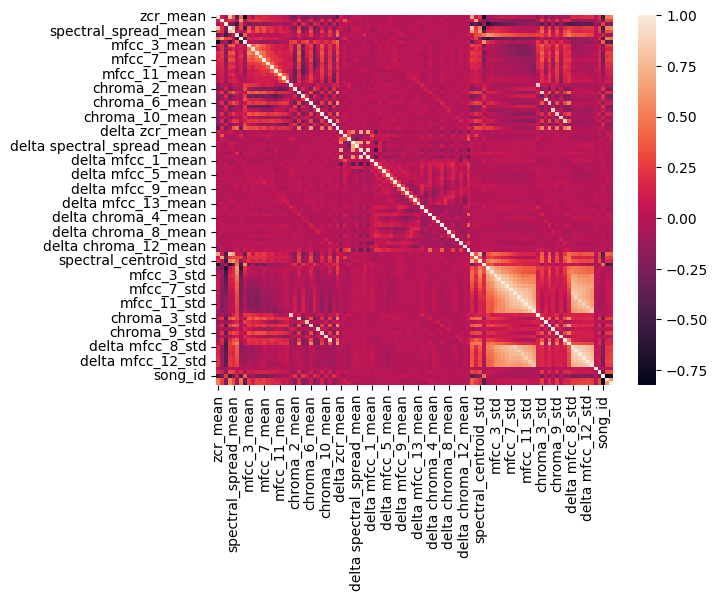

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

np.random.seed(123)

# this is the csv we extracted in previous step.
# it contains all audio and valence&arousal features
data = csv_to_pd('/content/drive/MyDrive/ai_unipi/MachineLearning/media/total_annotated_data.csv')
data['emotion'], data['song_id'] = data['song_id'], data['emotion']
print(data.head())
# remove the id column an/d the song_id column (first and last column)
data = data.iloc[:,:-1]

# print categorical values
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
print(data.info())

# get correlation matrix
corr = data.corr()
print(corr.head())
# Generate correlation heatmap
#sns.heatmap(corr)

# filter the values: because we have too many fearues (130x130 approximate matrix!
# we cannot conclude by looking at the heatmap.
# so, set a threshold for which we will consider the features
num_of_feats = corr.shape[0]
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.9:
            if columns[j]:
                columns[j] = False

# Get selected cols
selected_columns = data.columns[columns]
print(selected_columns.shape)
data1 = data[selected_columns]
corr1 = data1.corr()
print(corr1.head())
sns.heatmap(corr1)

### recursive feature elimination (RFE)

### Pearsons **coefficient**

In [100]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
#data1 = 20 * randn(1000) + 100
#data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(X, X)
print(data1.shape, data1.shape)
print('Pearsons correlation: %.3f' % corr)

ValueError: shapes (1744,139) and (1744,139) not aligned: 139 (dim 1) != 1744 (dim 0)

In [ ]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

### mRMR

In [ ]:
### Download dependencies
!pip install numpy Cython
!pip install -U pymrmr
!CC=gcc-10 CXX=g++-10 pip install -U pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp310-cp310-linux_x86_64.whl size=390129 sha256=6055b709077945674bb7311b1215e4f13faee1b767c01e03d9cae79574a1d43d
  Stored in directory: /root/.cache/pip/wheels/46/ae/55/4a2479c5f0de7eb363fe970cb18e4a750e03e4e63b1b5c2005
Successfully built pymrmr


In [ ]:
import pymrmr
import time

df = pd.read_csv('/content/total_data_nonan.csv')
colnames = df.columns.tolist()
colnames = colnames[1:]
colnames = colnames[-1:] + colnames[:-4]
df = df[colnames]
selected_cols = pymrmr.mRMR(df, 'MIQ', 20)
df = df[selected_cols]

### Sfm Selector

https://github.com/tyiannak/ml-python/blob/main/notebooks/12-feature_selection.ipynb

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from itertools import compress
sfm_selector = SelectFromModel(estimator=LogisticRegression())
sfm_selector.fit(X, y)
list_of_selected_features = list(compress(feature_names, sfm_selector.get_support().tolist()))
print(list_of_selected_features)

### Logistic Regression Ranking

https://github.com/tyiannak/ml-python/blob/main/notebooks/12-feature_selection.ipynb

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
# define the model
model_num = 2
data_num = 1 # 1: full dataset, 2: no std values, 3: no deltas or std values

if model_num == 1:
    model = LogisticRegression()
else:
    model = DecisionTreeRegressor()

if data_num == 1:
    X = np.array(data.iloc[:, :-3].values)#.T
    feature_names = data.columns.values
elif data_num == 2:
    X = np.array(midterm_mean.iloc[:, :-3].values)#.T
    feature_names = midterm_mean.columns.values
elif data_num == 3:
    X = np.array(short_term.iloc[:, :-3].values)#.T
    feature_names = short_term.columns.values

print(X.shape)
model.fit(X, y.reshape(-1))

# get importance
if model_num == 1:
    importance = model.coef_
    importance = np.abs(importance[0])
else:
    importance = model.feature_importances_
    print(importance.shape)
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    #imp_features = [f for i_f, f in enumerate(feature_names_s) if abs(importance[i_f]) < 0.05]

# gets the names in ascending importance order
feature_names_s = [feature_names[f] for f in importance.argsort()]
print(feature_names)
# Get the 10 least and most important features
less_important_5 = feature_names_s[:10]
most_important_5 = feature_names_s[:-11:-1]
print("Less important features:")
print(less_important_5)
print("Most important features:")
print(most_important_5)

df = data[most_important_5]
print(df)
X = np.array(df.iloc[:, :-3].values)#.T
y = np.array(data['emotion'])
print(X.shape)

(1744, 139)
(139,)
Feature: 0, Score: 0.00119
Feature: 1, Score: 0.01194
Feature: 2, Score: 0.01410
Feature: 3, Score: 0.25727
Feature: 4, Score: 0.00129
Feature: 5, Score: 0.06063
Feature: 6, Score: 0.00227
Feature: 7, Score: 0.00596
Feature: 8, Score: 0.09101
Feature: 9, Score: 0.00586
Feature: 10, Score: 0.00151
Feature: 11, Score: 0.00596
Feature: 12, Score: 0.00016
Feature: 13, Score: 0.00669
Feature: 14, Score: 0.00030
Feature: 15, Score: 0.00489
Feature: 16, Score: 0.00059
Feature: 17, Score: 0.00153
Feature: 18, Score: 0.00889
Feature: 19, Score: 0.00264
Feature: 20, Score: 0.00223
Feature: 21, Score: 0.00060
Feature: 22, Score: 0.01221
Feature: 23, Score: 0.00168
Feature: 24, Score: 0.01315
Feature: 25, Score: 0.00501
Feature: 26, Score: 0.00248
Feature: 27, Score: 0.00101
Feature: 28, Score: 0.00124
Feature: 29, Score: 0.01613
Feature: 30, Score: 0.00846
Feature: 31, Score: 0.00066
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00185
Feature: 34, Score: 0.00048
Feature: 35

In [ ]:
# plot above results
import plotly
import plotly.subplots
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt

def get_color_combinations(n_classes):
    clr_map = plt.cm.get_cmap('jet')
    range_cl = range(int(int(255/n_classes)/2), 255, int(255/n_classes))
    clr = []
    for i in range(n_classes):
        clr.append('rgba({},{},{},{})'.format(clr_map(range_cl[i])[0],
                                              clr_map(range_cl[i])[1],
                                              clr_map(range_cl[i])[2],
                                              clr_map(range_cl[i])[3]))
    return clr

list_of_feature_mtr = mid_term_features
n_columns=5
class_names = ['music', 'speech']
n_features = len(feature_names)
n_bins = 12
n_rows = 2
figs = plotly.subplots.make_subplots(rows=n_rows, cols=n_columns,
                                     subplot_titles=less_important_5 + most_important_5)
figs['layout'].update(height=(n_rows * 250))
clr = get_color_combinations(len(class_names))
count_less = count_most = 0
for i in range(n_features):
    if feature_names[i] in less_important_5 or feature_names[i] in most_important_5:
        if feature_names[i] in less_important_5:
            count_less += 1
        else:
            count_most += 1
        # for each feature get its bin range (min:(max-min)/n_bins:max)
        f = np.vstack([x[:, i:i + 1] for x in list_of_feature_mtr])
        bins = np.arange(f.min(), f.max(), (f.max() - f.min()) / n_bins)
        for fi, f in enumerate(list_of_feature_mtr):
            # load the color for the current class (fi)
            mark_prop = dict(color=clr[fi], line=dict(color=clr[fi], width=3))
            # compute the histogram of the current feature (i) and normalize:
            h, _ = np.histogram(f[:, i], bins=bins)
            h = h.astype(float) / h.sum()
            cbins = (bins[0:-1] + bins[1:]) / 2
            scatter_1 = go.Scatter(x=cbins, y=h, name=class_names[fi],
                                   marker=mark_prop, showlegend=(i == 0))
            # (show the legend only on the first line)
            if feature_names[i] in less_important_5:
                figs.append_trace(scatter_1, 1, count_less)
            else:
                figs.append_trace(scatter_1, 2, count_most)
for i in figs['layout']['annotations']:
    i['font'] = dict(size=10, color='#224488')
figs.show()
print("Least important (1st row) and most imporant (2nd row) feature distributions for two classes")

### -- LDA (?)

## Data split

In [183]:
#### COME HERE AFTER FEATURE SELECTION (for better results)
# Do not random split -
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size = 0.10)
print('X initial data =', X.shape, ', X_train size =', x_train.shape, ', x_test size =', x_test.shape)
# validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.12, random_state=1)
print('X_train size =', x_train.shape, ', x_val size =', x_val.shape)


X initial data = (1744, 7) , X_train size = (1569, 7) , x_test size = (175, 7)
X_train size = (1380, 7) , x_val size = (189, 7)


## Training
Classification to label 'emotion' with acoustic features


In [188]:
from sklearn import svm

print(x_train.shape)
# choose kernel for value range mapping
kernel = 1 # 1: rbf (default, no value), 2: polynomial, 3: linear
if kernel == 1:
    clf = svm.SVC()                       # initialize the classifier
elif kernel == 2:
    clf = svm.SVC(kernel = 'poly')
elif kernel == 3:
    clf = svm.SVC(kernel = 'linear')

clf.fit(x_train, y_train)                 # train the classifier
#y_pred = clf.predict([[100, 1]])
y_pred = clf.predict(x_test)
y_pred = clf.predict(x_test)
test_acc  = (np.count_nonzero(y_test==y_pred) / len(y_pred))
y_pred = clf.predict(x_train)
train_acc = (np.count_nonzero(y_train==y_pred) / len(y_pred))
print(f'SVC classification accuracy: {100*test_acc:.2f}%')
print(f'SVC classification train accuracy: {100*train_acc:.2f}%')

print(y_pred.shape)
print(y_train.shape)


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
test_acc  = (np.count_nonzero(y_test==y_pred) / len(y_pred))
y_pred = clf.predict(x_train)
train_acc = (np.count_nonzero(y_train==y_pred) / len(y_pred))

print(f'Decision Tree classification accuracy: {100*test_acc:.2f}%')
print(f'Decision Tree classification train accuracy: {100*train_acc:.2f}%')


(1380, 7)
SVC classification accuracy: 68.00%
SVC classification train accuracy: 67.39%
(1380,)
(1380,)
Decision Tree classification accuracy: 54.29%
Decision Tree classification train accuracy: 100.00%


full dataset (data_num = 1) + regressiontree selection:

- SVC classification accuracy: 69.71%
- SVC classification train accuracy: 67.90%

***Midterm no std dataset (data_num = 2) + regressiontree selection:***

- SVC classification accuracy: 70.86%
- SVC classification train accuracy: 67.75%

***Midterm no std no deltas dataset (data_num = 3) + regressiontree selection:***

- SVC classification accuracy: 70.86%
- SVC classification train accuracy: 67.68%

----

full dataset (data_num = 1) + logistic selection:

- SVC classification accuracy: 64.57%
- SVC classification train accuracy: 65.58%

Midterm no std dataset (data_num = 2) + logistic selection:

- SVC classification accuracy: 68.57%
- SVC classification train accuracy: 68.48%

Midterm no std no deltas dataset (data_num = 3) + logistic selection:

- SVC classification accuracy: 68.57%
- SVC classification train accuracy: 68.48%

---
Dataset 2 and 3 are similar, so i will only try datasets 1 and 3 from now on.

Better results with dataset without std values and with decision tree feature selection.

---
Different SVM kernel (above was for default RBF (kernel = 1))::

full dataset (data_num = 1) + logistic selection + linear (kernel = 3):

- SVC classification accuracy: 66.29%
- SVC classification train accuracy: 64.06%

full dataset (data_num = 1) + logistic selection + poly (kernel = 2):

- SVC classification accuracy: 62.86%
- SVC classification train accuracy: 63.77%

Midterm no std no deltas dataset (data_num = 3) + logistic selection + linear (kernel = 3):

- SVC classification accuracy: 69.71%
- SVC classification train accuracy: 65.94%

Midterm no std no deltas dataset (data_num = 3) + logistic selection + poly (kernel = 2):

- SVC classification accuracy: 66.29%
- SVC classification train accuracy: 68.12%

----

Best model: No std dataset with decision tree selection and RBF (default) SVM kernel

(1380,)
(270, 7)
[[ 0.91103515  0.94944682 -0.78041782 ... -0.71228362 -0.06003516
  -1.24966658]
 [ 1.35345972  0.97969484 -0.38288834 ...  0.74278386  0.4117878
  -0.66753124]
 [ 0.15056501 -0.74934772  2.49994278 ...  0.5557547  -1.49979243
   0.55483448]
 ...
 [-0.48158373  0.88225065  0.05012637 ...  0.25073567  0.62395748
  -1.25736604]
 [ 0.00710585  0.26992611 -0.84082166 ... -0.19241907  0.83895166
  -0.30456991]
 [-0.19719072  0.90219721 -1.27070524 ... -0.18795853  0.54495019
   0.33814726]]
(245, 7)


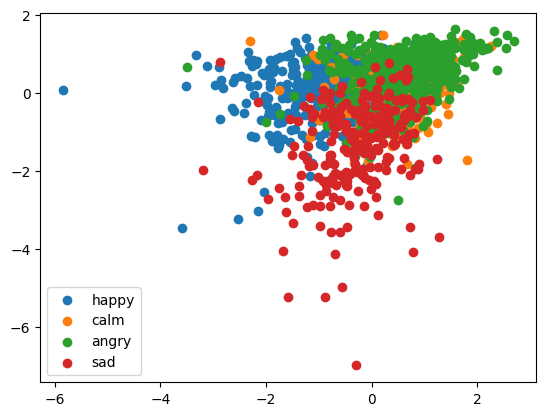

Adjusted Mutual Information (AMI): 0.14892600948597828
Adjusted Rand Index (ARI): 0.16603274803924578


In [165]:
# dataset split
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is your feature matrix
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_train)

# Get cluster assignments for each data point
cluster_labels = kmeans.predict(x_train)

print(cluster_labels.shape)

filtered_label1 = x_train[cluster_labels == 1]
filtered_label2 = x_train[cluster_labels == 2]
filtered_label3 = x_train[cluster_labels == 3]
filtered_label4 = x_train[cluster_labels == 4]
print(filtered_label1.shape)
#Plotting the results
u_labels = np.unique(cluster_labels)
emotions = ['happy','calm','angry','sad']
print(x_train)
print(x_train[cluster_labels == 3 , :].shape)
for i in u_labels:
    plt.scatter(x_train[cluster_labels == i , 0] , x_train[cluster_labels == i , 1] , label = emotions[i])
plt.legend()
plt.show()

#### Print accuracy
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score
ami = adjusted_mutual_info_score(y_train, cluster_labels)
ari = adjusted_rand_score(y_train, cluster_labels)
print("Adjusted Mutual Information (AMI):", ami)
print("Adjusted Rand Index (ARI):", ari)

In [166]:
### try with regression to arouusal and valence
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize a multi-output regressor (you can use any regression model)
regressor = MultiOutputRegressor(RandomForestRegressor(random_state=42))
regressor.fit(x_train, y_r)

# Predict the y values for the testing data
y_pred = regressor.predict(x_test)

# Calculate the mean squared error for each target variable
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')

print("Mean Squared Error for each target variable:", mse)

ValueError: y must have at least two dimensions for multi-output regression but has only one.

## Evaluation


### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_predict

def accuracy(clf, data, target):
    results = cross_val_predict(clf, data ,target ,cv = 10)
    return metrics.accuracy_score(target,results)

## Tuning

### Grid search

https://github.com/jmcabreira-zz/Data-Science-Projects/blob/master/A-Music-Taste-Analysis-Using-Spotify-API-and-Python./Playlist_analysis_%20.ipynb

In [189]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Values for parameter C

C_list = [0.001 , 0.01, 0.1 , 1 , 10 , 100]

#Values for parameter Gamma
Gamma_list = [0.001, 0.01 , 0.1, 1, 10, 100]


# Dictionary with lists of parameters
Grid_parameters = dict(clf__C = C_list, clf__gamma = Gamma_list)
Grid_parameters

# Grid object with pip_1, Grid_parameters, numbers of folders (cv) and accuracy (scoring) as parameters
grid = GridSearchCV(pip_1,Grid_parameters,cv = 10, scoring = 'accuracy')


#Apply gridsearch to our data and target
grid.fit(df_couple,target)

grid.grid_scores_

grid.best_params_


#TEST tracking with weights&biases tool

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
!wandb login
#api key fce0365f7ea31edd4551980d8fc3084d9832b9df

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: Currently logged in as: poulianouxaido (emo-team). Use `wandb login --relogin` to force relogin


acc,▁▃▆▆▆▆▇█
loss,█▆▄▂▁▁▂▁
acc,0.73732
loss,0.24214
